# 다항회귀

## 다항식 특성으로 변환

In [17]:
# sampel [[0,1][2, 3]] 변환 연습
import numpy as np

X=np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [22]:
poly.fit(X)
x_poly=poly.transform(X)

print(x_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [23]:
poly.fit_transform(X)

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [24]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

## 사이킷런으로 다항 회귀 분석

In [ ]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

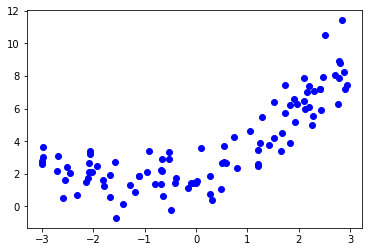

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X=6*np.random.rand(100,1)-3
y=0.5*X**2+X+2+np.random.randn(100,1)

plt.scatter(X,y,color='blue')
plt.show()

In [ ]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

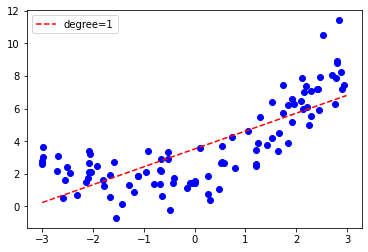

In [27]:
from sklearn.linear_model import LinearRegression

X1_train = X
y_train =y

reg1=LinearRegression().fit(X1_train,y_train)

#np.newaxis 새로운 축 추가. ( 차원 늘리기 )
xx=np.arange(-3,3,0.01)[:,np.newaxis]
yy=reg1.predict(xx)
plt.plot(xx,yy,color='r',linestyle='--',label='degree=1')
plt.scatter(X,y,color='b')
plt.legend()

plt.show()

In [ ]:
# 3) 2차항 형태로 다항 회귀 수행

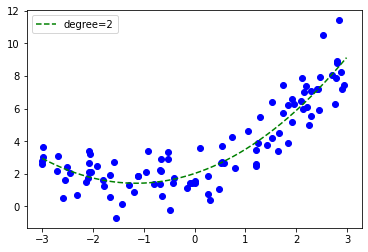

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X2_train=poly.fit_transform(X)
y_train=y

reg2 = LinearRegression().fit(X2_train,y_train)

xx=np.arange(-3,3,0.01)
yy=reg2.predict(poly.transform(xx[:,np.newaxis])) # fit 안함!!!!

plt.plot(xx,yy,color='g',linestyle='--',label='degree=2')
plt.scatter(X,y,color='b')
plt.legend()
plt.show()

In [ ]:
# 구해진 2차식의 계수 확인

In [30]:
reg2.intercept_, reg2.coef_ #상수항 bias x x^2

(array([2.01440878]), array([[0.        , 1.03615831, 0.44871919]]))

In [ ]:
# y = 0.45x^2 + 1.04x + 2.01

In [ ]:
# 4) 7차항 형태로 다항회귀 수행

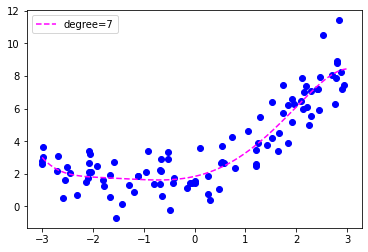

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7)

X7_train=poly.fit_transform(X)
y_train=y

reg7 = LinearRegression().fit(X7_train,y_train)

xx=np.arange(-3,3,0.01)
yy=reg7.predict(poly.transform(xx[:,np.newaxis])) # fit 안함!!!!

plt.plot(xx,yy,color='magenta',linestyle='--',label='degree=7')
plt.scatter(X,y,color='b')
plt.legend()
plt.show()

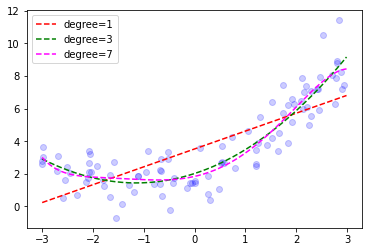

In [37]:
#1차 2차 7차 비교
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree=[1,3,7]
colors=['red','green','magenta']

plt.scatter(X,y,color='b', alpha=0.2)
for i,d in enumerate(degree): #for 문 돌때마다 degree 원소 내놓으면서 인덱스까지 한 튜플로 내놓음
    poly=PolynomialFeatures(degree=d)
    X_train=poly.fit_transform(X)
    y_train=y
    
    reg=LinearRegression().fit(X_train,y_train)
    xx=np.arange(-3,3,0.01)
    yy=reg.predict(poly.transform(xx[:,np.newaxis]))
    
    plt.plot(xx,yy,color=colors[i],linestyle='--',label='degree={}'.format(d))
    plt.legend()

plt.show()

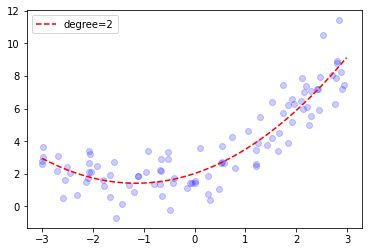

In [39]:
#pipeline
from sklearn.pipeline import make_pipeline

reg=make_pipeline(PolynomialFeatures(degree=2),LinearRegression()).fit(X,y)
xx=np.arange(-3,3,0.01)[:,np.newaxis]
yy=reg.predict(xx)

plt.plot(xx,yy,color='r',linestyle='--',label='degree=2')
plt.scatter(X,y,color='b',alpha=0.2)
plt.legend()
plt.show()

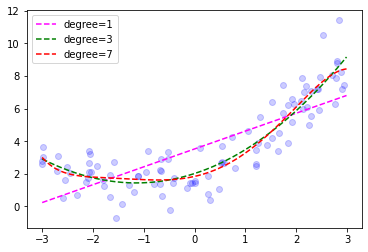

In [43]:
#1차 2차 7차 비교
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree=[1,3,7]
colors=['magenta','green','red']

plt.scatter(X,y,color='b', alpha=0.2)
for i,d in enumerate(degree): #for 문 돌때마다 degree 원소 내놓으면서 인덱스까지 한 튜플로 내놓음
    reg=make_pipeline(PolynomialFeatures(degree=d),LinearRegression()).fit(X,y)
    xx=np.arange(-3,3,0.01)[:,np.newaxis]
    yy=reg.predict(xx)
    
    plt.plot(xx,yy,color=colors[i],linestyle='--',label='degree={}'.format(d))
    plt.legend()

plt.show()

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

#### 데이터 수집

In [ ]:
boston = load_boston()

#### 데이터 이해

In [ ]:
#boston.DESCR
print(boston.feature_names)

#### 데이터 준비

In [ ]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [ ]:
# 데이터프레임 확인


In [ ]:
# 학습용, 검증용 데이터 분할


#### 모델 구축

In [ ]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
# 방의 갯수 최대값, 최소값

In [ ]:
#원본 데이터 단순 회귀


In [ ]:
# 아래 셀에 있는 '???'를 지우고 본인이 작성한 코드를 입력하면 됩니다. 

In [ ]:
# 2차식의 다항회귀
X2_train = ???
X2_test = ???

reg2 = ???
y_pred2 = ???

print(reg2.coef_, reg2.intercept_)

xx2 = ???
yy2 = ???

In [ ]:
# 3차식의 다항회귀
X3_train = ???
X3_test = ???

reg3 = ???
y_pred3 = ???

print(reg3.coef_, reg3.intercept_)

xx3 = ???
yy3 = ???


####  다항 회귀 시각화

#### 모델 성능 평가

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
data = { 1 : r2_score(y_test, y_pred1),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
print(pd.Series(data))
